In [2]:
import os
import csv
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [3]:
OUTPUT_DIR = os.path.join('..', '..', 'processed')

In [4]:
def get_entity_type(entity_tag):
    if entity_tag == 'O' or entity_tag.startswith('I-'):
        return None

    result = entity_tag.split('-')[-1]
    return result

def calculate_dataset_statistics():
    entity_types_without_duplications = Counter()
    entity_types = Counter()
    sub_entity_types = {
        'gender': Counter(),
        'legal-status': Counter(),
        'role': Counter()
    }

    duplicated_words = []
    total_words = 0
    total_tags = 0

    output_file = os.path.join(OUTPUT_DIR, 'train-nl.tsv')
    with open(output_file, 'r', encoding='utf-8', newline='') as file_handler:
        csv_reader = csv.DictReader(file_handler, fieldnames=['TOKEN', 'NE-MAIN', 'NE-PER-GENDER', 'NE-PER-LEGAL-STATUS', 'NE-PER-ROLE', 'MISC'], delimiter='\t')
        for i, row in enumerate(csv_reader):
            if i == 0:
                continue

            # skip all empty and commented lines
            if row['NE-MAIN'] == '':
                continue

            total_words += 1
            main_entity_type = get_entity_type(row['NE-MAIN'])
            if main_entity_type is None:
                continue

            total_tags += 1
            entity_types_without_duplications[main_entity_type] += 1
            entity_types[main_entity_type] += 1

            gender = get_entity_type(row['NE-PER-GENDER'])
            if gender is not None:
                sub_entity_types['gender'][gender] += 1

            legal_status = get_entity_type(row['NE-PER-LEGAL-STATUS'])
            if legal_status is not None:
                sub_entity_types['legal-status'][legal_status] += 1

            role = get_entity_type(row['NE-PER-ROLE'])
            if role is not None:
                sub_entity_types['role'][role] += 1

            if row['MISC'] != '_':
                duplicated_types = row['MISC'].split(',')
                duplicated_words.append(len(duplicated_types))

                for duplicated_type in duplicated_types:
                    duplicated_entity_type = get_entity_type(duplicated_type)
                    if duplicated_entity_type is not None:
                        entity_types[duplicated_entity_type] += 1

    return entity_types_without_duplications, entity_types, sub_entity_types, duplicated_words, total_words, total_tags

In [5]:
entity_types_without_duplications, entity_types, sub_entity_types, duplicated_words, total_words, total_tags = calculate_dataset_statistics()

In [6]:
print(f'Total words: {total_words}')
print(f'Total tags: {total_tags}')
print(f'Total duplications: {len(duplicated_words)}')
print(f'Avg duplications: {np.mean(duplicated_words)}')

Total words: 315885
Total tags: 11159
Total duplications: 6092
Avg duplications: 1.0137885751805646


In [7]:
def plot_pie_entity_types(entity_types, title, ax):
        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        labels = list(entity_types.keys())
        sizes = list(entity_types.values())

        ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        ax.set_title(title, fontweight='bold')

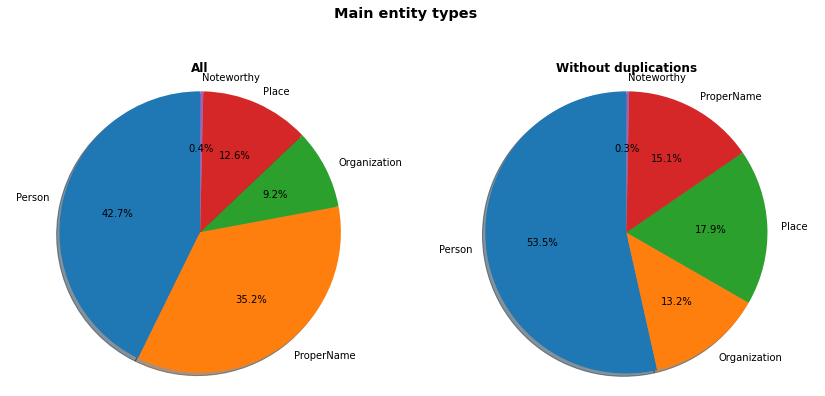

In [8]:
width = 6
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(width*2,width))
fig.tight_layout(rect=[0, 0.03, 1, 0.85])

fig.suptitle('Main entity types', fontweight='bold', fontsize='x-large')

plot_pie_entity_types(entity_types, 'All', ax1)
plot_pie_entity_types(entity_types_without_duplications, 'Without duplications', ax2)

plt.show()

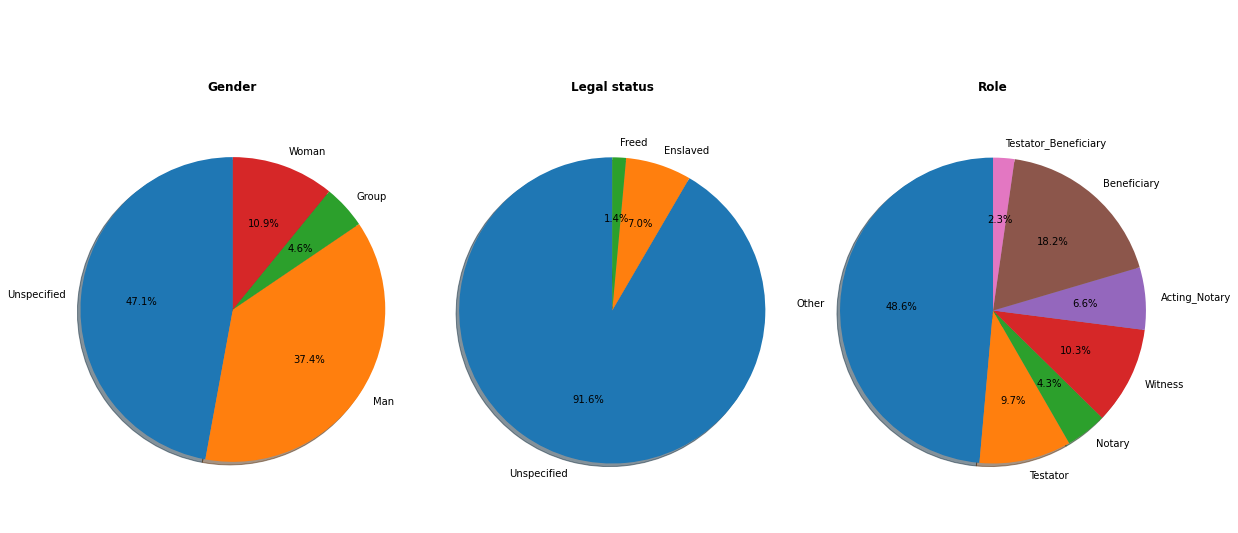

In [9]:
width = 8
fig, axes = plt.subplots(1, 3, figsize=(width*2,width))
fig.tight_layout(rect=[0, 0.03, 1, 0.85])

fig.suptitle('Sub entity types', fontweight='bold', fontsize='x-large')

for (type, values), ax in zip(sub_entity_types.items(), axes):
    user_friendly_type = type.replace('-', ' ').capitalize()
    plot_pie_entity_types(values, user_friendly_type, ax)

plt.show()